# Засоби підготовки та аналізу даних
### Лабораторна робота №4
##### ФБ-22 Ялбуган Федір

### Перший рівень (спрощені завдання)

Імпортуємо потрібні бібліотеки

In [6]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import timeit as ti
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import csv

Завантажуємо датасет та створюємо .csv файл

In [2]:
individual_household_electric_power_consumption = fetch_ucirepo(id=235)
X = individual_household_electric_power_consumption.data.features
X_df = pd.DataFrame(X)
X_df.to_csv('individual_household_electric_power_consumption.csv', index=False)
print(X_df)

c:\Users\fyalb\AppData\Local\Programs\Python\Python311\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

Завантажуємо датасет у змінні, видаляємо зниклі дані, перетворюємо рядкові дані на числові

In [111]:
data_dataframe = pd.read_csv('individual_household_electric_power_consumption.csv')
data_dataframe = data_dataframe.dropna()
data_dataframe['DateTime'] = pd.to_datetime(data_dataframe['Date'] + ' ' + data_dataframe['Time'])
for column in data_dataframe.columns[2:-1]:
    data_dataframe[column] = pd.to_numeric(data_dataframe[column], errors='coerce')
print(data_dataframe)

data_numpy = np.array(X)

def remove_rows(npy):
    mask = np.any(npy == '?', axis=1)
    return npy[~mask]

data_numpy = remove_rows(data_numpy)

data_numpy[:, 2:8] = data_numpy[:, 2:8].astype(float)

print(data_dataframe)
print(data_numpy)

C:\Users\fyalb\AppData\Local\Temp\ipykernel_9360\14883484.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_dataframe = pd.read_csv('individual_household_electric_power_consumption.csv')
C:\Users\fyalb\AppData\Local\Temp\ipykernel_9360\14883484.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_dataframe['DateTime'] = pd.to_datetime(data_dataframe['Date'] + ' ' + data_dataframe['Time'])


               Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0    

1. Обрати всі домогосподарства, у яких загальна активна споживана
потужність перевищує 5 кВт.

In [112]:
def task1_numpy(data_numpy):
    return data_numpy[data_numpy[:, 2] > 5]

def task1_dataframe(data_dataframe):
    return data_dataframe[data_dataframe['Global_active_power'] > 5]

print('Виборка Numpy:\n', task1_numpy(data_numpy))
print("Час виконання Numpy:", ti.timeit(lambda: task1_numpy(data_numpy), number=1))

print('Виборка DataFrame:\n', task1_dataframe(data_dataframe))
print("Час виконання DataFrame:", ti.timeit(lambda: task1_dataframe(data_dataframe), number=1))

Виборка Numpy:
 [['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... 0.0 1.0 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]
Час виконання Numpy: 0.0795657000016945
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
11       16/12/2006  17:35:00                5.412                  0.470   
12       16/12/2006  17:36:00                5.224                  0.478   
...             ...       ...                  ...                    ...   
2069356  22/11/2010  18:40:00                5.408                  0.150   
20

2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [113]:
def task2_numpy(data_numpy):
    return data_numpy[data_numpy[:, 4] > 235]

def task2_dataframe(data_dataframe):
    return data_dataframe[data_dataframe['Voltage'] > 235]

print('Виборка Numpy:\n', task2_numpy(data_numpy))
print("Час виконання Numpy:", ti.timeit(lambda: task2_numpy(data_numpy), number=1))

print('Виборка DataFrame:\n', task2_dataframe(data_dataframe))
print("Час виконання DataFrame:", ti.timeit(lambda: task2_dataframe(data_dataframe), number=1))


Виборка Numpy:
 [['16/12/2006' '17:28:00' 3.666 ... 0.0 1.0 17.0]
 ['16/12/2006' '17:29:00' 3.52 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:30:00' 3.702 ... 0.0 1.0 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]
Час виконання Numpy: 0.4178516000029049
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
4        16/12/2006  17:28:00                3.666                  0.528   
5        16/12/2006  17:29:00                3.520                  0.522   
6        16/12/2006  17:30:00                3.702                  0.520   
7        16/12/2006  17:31:00                3.700                  0.520   
14       16/12/2006  17:38:00                4.054                  0.422   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
207525

3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [114]:
def task3_numpy(data_numpy):
    return data_numpy[(data_numpy[:, 7] > data_numpy[:, 8]) & (data_numpy[:, 5] <= 20) & (data_numpy[:, 5] >= 19)]

def task3_dataframe(data_dataframe):
    return data_dataframe[(data_dataframe['Sub_metering_2'] > data_dataframe['Sub_metering_3']) & (data_dataframe['Global_intensity'] <= 20) & (data_dataframe['Global_intensity'] >= 19)]

print('Виборка Numpy:\n', task3_numpy(data_numpy))
print("Час виконання Numpy:", ti.timeit(lambda: task3_numpy(data_numpy), number=1))

print('Виборка DataFrame:\n', task3_dataframe(data_dataframe))
print("Час виконання DataFrame:", ti.timeit(lambda: task3_dataframe(data_dataframe), number=1))

Виборка Numpy:
 [['16/12/2006' '18:09:00' 4.464 ... 0.0 37.0 16.0]
 ['17/12/2006' '01:04:00' 4.582 ... 0.0 13.0 0.0]
 ['17/12/2006' '01:08:00' 4.618 ... 0.0 27.0 0.0]
 ...
 ['24/11/2010' '07:55:00' 4.602 ... 0.0 40.0 17.0]
 ['24/11/2010' '07:56:00' 4.536 ... 0.0 39.0 17.0]
 ['24/11/2010' '07:57:00' 4.626 ... 0.0 39.0 17.0]]
Час виконання Numpy: 0.18254909999814117
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
45       16/12/2006  18:09:00                4.464                  0.136   
460      17/12/2006  01:04:00                4.582                  0.258   
464      17/12/2006  01:08:00                4.618                  0.104   
475      17/12/2006  01:19:00                4.636                  0.140   
476      17/12/2006  01:20:00                4.634                  0.152   
...             ...       ...                  ...                    ...   
2071589  24/11/2010  07:53:00                4.666                  0.000 

4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії

In [117]:
def task4_numpy(data_numpy):
    random_indices = np.random.choice(data_numpy.shape[0], size=500000, replace=False)
    random_sample_np = data_numpy[random_indices, :]
    sub_metering_means = np.mean(random_sample_np[:, 6:9], axis=0)
    return sub_metering_means, random_sample_np

def task4_dataframe(data_dataframe):
    random_sample_df = data_dataframe.sample(n=500000, replace=False)
    sub_metering_means = random_sample_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return sub_metering_means, random_sample_df


numpy_sub_metering_means, random_sample_np = task4_numpy(data_numpy)
dataframe_sub_metering_means, random_sample_df = task4_dataframe(data_dataframe)

print('Виборка Numpy:\n', numpy_sub_metering_means)
print("Час виконання Numpy:", ti.timeit(lambda: task4_numpy(data_numpy), number=1))

print('Виборка DataFrame:\n', dataframe_sub_metering_means)
print("Час виконання DataFrame:", ti.timeit(lambda: task4_dataframe(data_dataframe), number=1))

Виборка Numpy:
 [1.117846 1.28758 6.455602]
Час виконання Numpy: 0.4769581000000471
Виборка DataFrame:
 Sub_metering_1    1.115796
Sub_metering_2    1.289442
Sub_metering_3    6.467804
dtype: float64
Час виконання DataFrame: 0.30289489999995567


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [119]:
def task5_numpy(data_numpy):
    power_consumption = data_numpy[(np.array([int(time.split(':')[0]) for time in data_numpy[:, 1]]) >= 18) & 
                                   (data_numpy[:, 2].astype(float) > 6)]

    filtered_data = power_consumption[(power_consumption[:, 6].astype(float) + 
                                       power_consumption[:, 7].astype(float) + 
                                       power_consumption[:, 8].astype(float)) > 6]

    result = np.concatenate([filtered_data[:len(filtered_data) // 2:3], filtered_data[len(filtered_data) // 2::4]])

    return result

def task5_dataframe(data_dataframe):

    filtered_data = data_dataframe[(data_dataframe['DateTime'].dt.hour >= 18) & 
                                  (data_dataframe['Global_active_power'].astype(float) > 6)]


    filtered_data = filtered_data[(filtered_data['Sub_metering_1'] + 
                                   filtered_data['Sub_metering_2'] + 
                                   filtered_data['Sub_metering_3']) > 6]

    first_half = filtered_data.iloc[:len(filtered_data)//2]
    second_half = filtered_data.iloc[len(filtered_data)//2:]

    result = pd.concat([first_half.iloc[::3], second_half.iloc[::4]])

    return result

print('Виборка Numpy:\n', task5_numpy(data_numpy))
print("Час виконання Numpy:", ti.timeit(lambda: task5_numpy(data_numpy), number=1))
print('Виборка DataFrame:\n', task5_dataframe(data_dataframe))
print("Час виконання DataFrame:", ti.timeit(lambda: task5_dataframe(data_dataframe), number=1))

Виборка Numpy:
 [['16/12/2006' '18:05:00' 6.052 ... 0.0 37.0 17.0]
 ['16/12/2006' '18:08:00' 6.308 ... 0.0 36.0 17.0]
 ['17/12/2006' '18:18:00' 6.204 ... 0.0 0.0 16.0]
 ...
 ['20/11/2010' '18:40:00' 6.416 ... 16.0 35.0 16.0]
 ['20/11/2010' '18:44:00' 6.374 ... 15.0 36.0 16.0]
 ['20/11/2010' '18:52:00' 6.364 ... 17.0 34.0 16.0]]
Час виконання Numpy: 0.5994447999983095
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
41       16/12/2006  18:05:00                6.052                  0.192   
44       16/12/2006  18:08:00                6.308                  0.116   
1494     17/12/2006  18:18:00                6.204                  0.116   
8884     22/12/2006  21:28:00                7.884                  0.136   
8887     22/12/2006  21:31:00                7.602                  0.148   
...             ...       ...                  ...                    ...   
2066468  20/11/2010  18:32:00                6.710                  0.3

### Другий рівень (ускладнений)

Завантажуємо обраний датасет

In [221]:
auto_mpg = fetch_ucirepo(id=9) 
  
X = auto_mpg.data.features 

X_df = pd.DataFrame(X)

X_df.to_csv('auto_mpg.csv', index=False)

print(X_df)

     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

Завантажуємо дані із файлу

In [220]:
auto_mpg_np = np.array(X)
print(auto_mpg_np)

auto_mpg_df = pd.read_csv('auto_mpg.csv')
print(auto_mpg_df)


[[307.    8.  130.  ...  12.   70.    1. ]
 [350.    8.  165.  ...  11.5  70.    1. ]
 [318.    8.  150.  ...  11.   70.    1. ]
 ...
 [135.    4.   84.  ...  11.6  82.    1. ]
 [120.    4.   79.  ...  18.6  82.    1. ]
 [119.    4.   82.  ...  19.4  82.    1. ]]
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4      

1. Поборотися із зниклими даними.

In [219]:
def remove_rows(npy):
    mask = np.any(np.isnan(npy), axis=1)
    return npy[~mask]

auto_mpg_np = remove_rows(auto_mpg_np)

print(auto_mpg_np)

auto_mpg_df = auto_mpg_df.dropna()
print(auto_mpg_df)


[[ 0.61757106  8.          0.45652174 ...  0.23809524 70.
   1.        ]
 [ 0.72868217  8.          0.64673913 ...  0.20833333 70.
   1.        ]
 [ 0.64599483  8.          0.56521739 ...  0.17857143 70.
   1.        ]
 ...
 [ 0.17312661  4.          0.20652174 ...  0.21428571 82.
   1.        ]
 [ 0.13436693  4.          0.17934783 ...  0.63095238 82.
   1.        ]
 [ 0.13178295  4.          0.19565217 ...  0.67857143 82.
   1.        ]]
     displacement  cylinders  horsepower    weight  acceleration  model_year  \
0        0.617571          8    0.456522  0.536150      0.238095          70   
1        0.728682          8    0.646739  0.589736      0.208333          70   
2        0.645995          8    0.565217  0.516870      0.178571          70   
3        0.609819          8    0.565217  0.516019      0.238095          70   
4        0.604651          8    0.510870  0.520556      0.148810          70   
..            ...        ...         ...       ...           ...         ...

2. Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [218]:
dataframe_normalized = ['displacement', 'horsepower', 'weight', 'acceleration']
for col in dataframe_normalized:
    min_val = auto_mpg_df[col].min()
    max_val = auto_mpg_df[col].max()
    auto_mpg_df[col] = (auto_mpg_df[col] - min_val) / (max_val - min_val)

print(auto_mpg_df['displacement'], auto_mpg_df['horsepower'], auto_mpg_df['weight'], auto_mpg_df['acceleration'])

numpy_normalized = [0, 2, 3, 4]

for col in numpy_normalized:
    min_val = auto_mpg_np[:, col].min()
    max_val = auto_mpg_np[:, col].max()
    auto_mpg_np[:, col] = (auto_mpg_np[:, col] - min_val) / (max_val - min_val)

print(auto_mpg_np[:, 0])
print(auto_mpg_np[:, 2])
print(auto_mpg_np[:, 3])
print(auto_mpg_np[:, 4])

0      0.617571
1      0.728682
2      0.645995
3      0.609819
4      0.604651
         ...   
393    0.186047
394    0.074935
395    0.173127
396    0.134367
397    0.131783
Name: displacement, Length: 392, dtype: float64 0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 392, dtype: float64 0      0.536150
1      0.589736
2      0.516870
3      0.516019
4      0.520556
         ...   
393    0.333711
394    0.146583
395    0.193365
396    0.286929
397    0.313864
Name: weight, Length: 392, dtype: float64 0      0.238095
1      0.208333
2      0.178571
3      0.238095
4      0.148810
         ...   
393    0.452381
394    0.988095
395    0.214286
396    0.630952
397    0.678571
Name: acceleration, Length: 392, dtype: float64
[0.61757106 0.72868217 0.64599483 0.60981912 0.60465116 0.93281654
 0.99741602 0.96124031 1.         0.83204134 

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

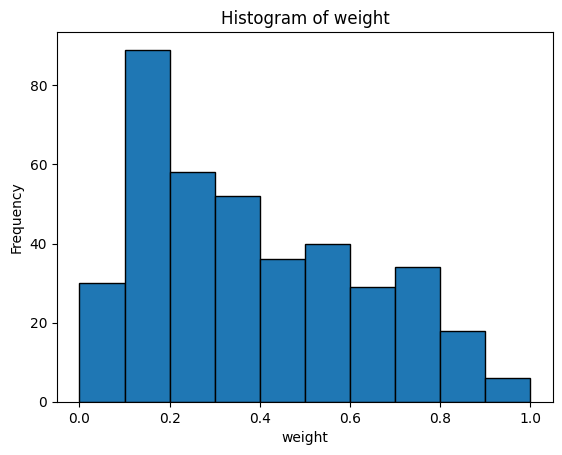

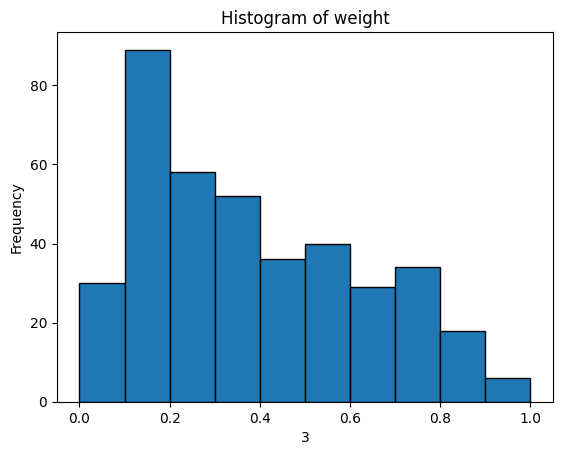

In [217]:
attribute = 'weight'

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

plt.hist(auto_mpg_df[attribute], bins=bins, edgecolor='black')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.title('Histogram of ' + attribute)
plt.show()

attribute = 3

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

plt.hist(auto_mpg_np[:, attribute], bins=bins, edgecolor='black')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.title(f'Histogram of weight')
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

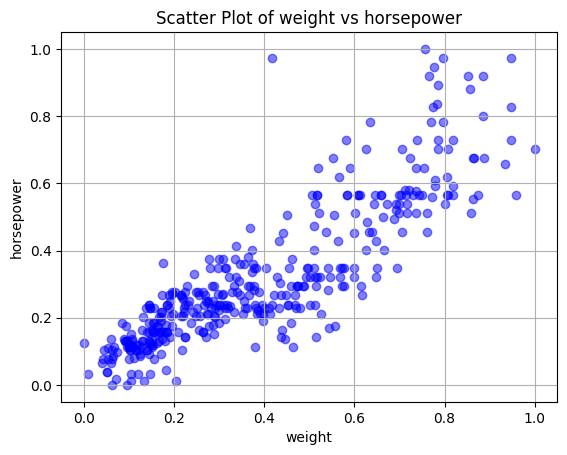

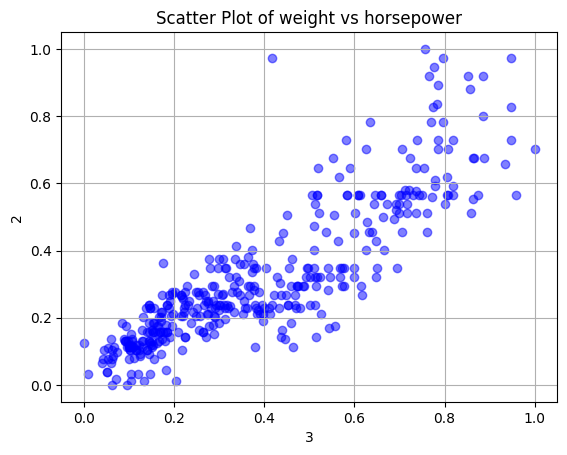

In [216]:
x_attribute = 'weight'
y_attribute = 'horsepower'

plt.scatter(auto_mpg_df[x_attribute], auto_mpg_df[y_attribute], color='blue', alpha=0.5)
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot of {x_attribute} vs {y_attribute}')
plt.grid(True)
plt.show()

x_attribute = 3
y_attribute = 2

plt.scatter(auto_mpg_np[:, x_attribute], auto_mpg_np[:, y_attribute], color='blue', alpha=0.5)
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot of weight vs horsepower')
plt.grid(True)
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [215]:
attribute1 = 'weight'
attribute2 = 'horsepower'

x = auto_mpg_df[attribute1]
y = auto_mpg_df[attribute2]

pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman correlation coefficient: {spearman_corr}")


x = auto_mpg_np[:, 3]
y = auto_mpg_np[:, 2]

pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman correlation coefficient: {spearman_corr}")

Pearson correlation coefficient: 0.8645377375741444
Spearman correlation coefficient: 0.878819325346196
Pearson correlation coefficient: 0.8645377375741444
Spearman correlation coefficient: 0.878819325346196


6. Провести One Hot Encoding категоріального string атрибуту.

In [214]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(auto_mpg_df[['origin']])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])

result_df = pd.concat([auto_mpg_df, encoded_df], axis=1)

print("\nEncoded DataFrame:")
print(result_df)

col_origin = auto_mpg_np[:, 6].reshape(-1,1)

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(col_origin).toarray()

encoded_numpy = np.concatenate((auto_mpg_np, encoded_data), axis=1)

print("\nEncoded Numpy:")
print(encoded_numpy)


Encoded DataFrame:
     displacement  cylinders  horsepower    weight  acceleration  model_year  \
0        0.617571        8.0    0.456522  0.536150      0.238095        70.0   
1        0.728682        8.0    0.646739  0.589736      0.208333        70.0   
2        0.645995        8.0    0.565217  0.516870      0.178571        70.0   
3        0.609819        8.0    0.565217  0.516019      0.238095        70.0   
4        0.604651        8.0    0.510870  0.520556      0.148810        70.0   
..            ...        ...         ...       ...           ...         ...   
126           NaN        NaN         NaN       NaN           NaN         NaN   
330           NaN        NaN         NaN       NaN           NaN         NaN   
336           NaN        NaN         NaN       NaN           NaN         NaN   
354           NaN        NaN         NaN       NaN           NaN         NaN   
374           NaN        NaN         NaN       NaN           NaN         NaN   

     origin    1   

7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

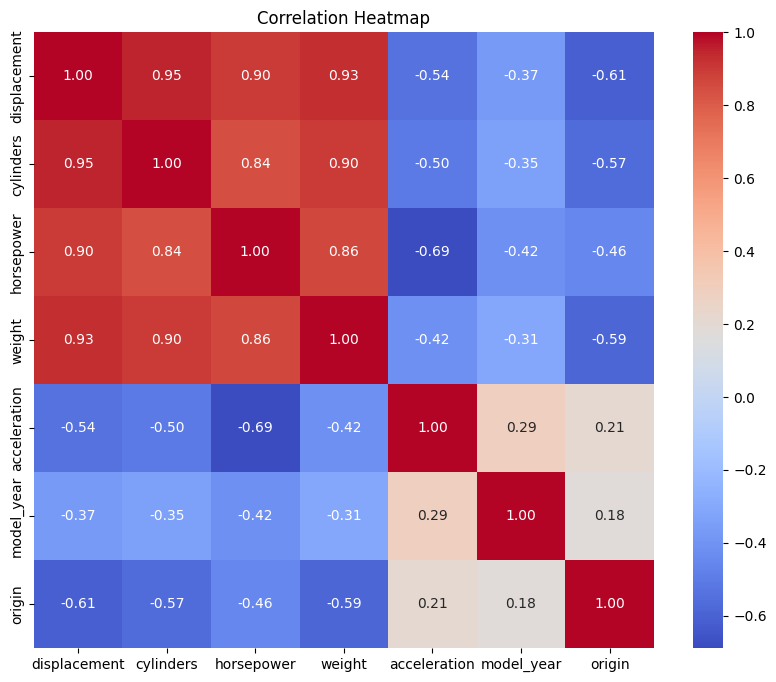

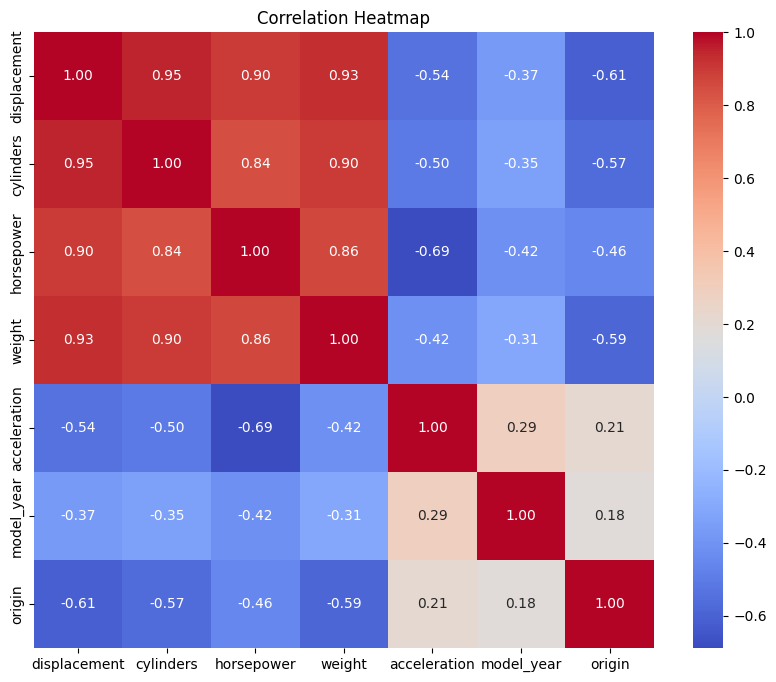

In [213]:
corr_matrix = auto_mpg_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

corr_matrix_np = np.transpose(auto_mpg_np)
heatmap = np.corrcoef(corr_matrix_np)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
